<h2>🚩Задача классификации</h2>

✅<b>Задача бинарной классификации</b> состои в корректном разделении объектов на на два класса - -1 и 1. Классификатор при разделении проводит гиперплоскость, которая и отделяет объекты одного класса от объектов другого класса. Пример гиперплоскости для двумерного пространства:<br>
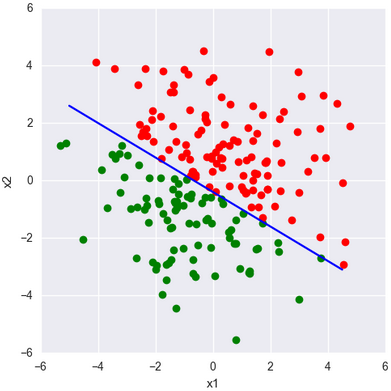

На практике выделяют линейно разделимые и линейно неразделимыые группы. В первом случае классификатору удается провести гиперплоскость, которая разделила бы безошибочно все(почти) объекты по верным классам, когда во втором объекты как бы "перемешаны", что затрудняет их полное разделение.

✅<b>Линейные классифкаторы</b> построены на следующей идее: в качестве метки класса мы будем брать не скалярное произведение вектора весов на матрицу признаков, а его знак - если это минус, то объект находится под гиперплоскостью, если же плюс, то над ней. В случае, если знак равен нулю, то говорят, что модель отказывается от классификации. Сам же числовой коэффициент, получаемый в результате скалярного произведения, называется <b>отступом</b> классификатора. Он показывает, насколько модель погружена в свой класс(то есть как далеко она находится от разделяющей гиперплоскости). Итак, знак скалярного произведения показывает, к какому классу относится объект(с какой стороны от гиперплоскости он лежит), а модуль скалярного произведения показывает, как сильно объект отдалился от гиперплоскости. Математически это записывается так:<br>
$a(x) = sign(\left\langle w, x \right\rangle + w_0)=sign(\sum_{j=1}^{d}w_jx_j+w_0)$<br>
Где $a(x)$ - прогноз модели.

✅<b>Обучение</b><br>
Логично, что в процессе обучения линейного классификатора мы хотим получать как можно меньше неправильных ответов модели. Поэтому разумно будет ввести следующий функционал потерь:<br>
$Q(a, X) = \frac{1}{l}\sum_{i=1}^{l}[a(x_i)\neq y_i]=\frac{1}{l}\sum_{i=1}^{l}[sign(\left\langle w,x_i \right\rangle)\neq y_i]\longrightarrow min$<br>
Свободный коэффициент не учитываем - будем считать, что у нас есть константа.<br>
Проблема такого функционала в том, что он является дискретным, то есть графически он выглядит так:<br>
$L(M)=[M<0]$<br>
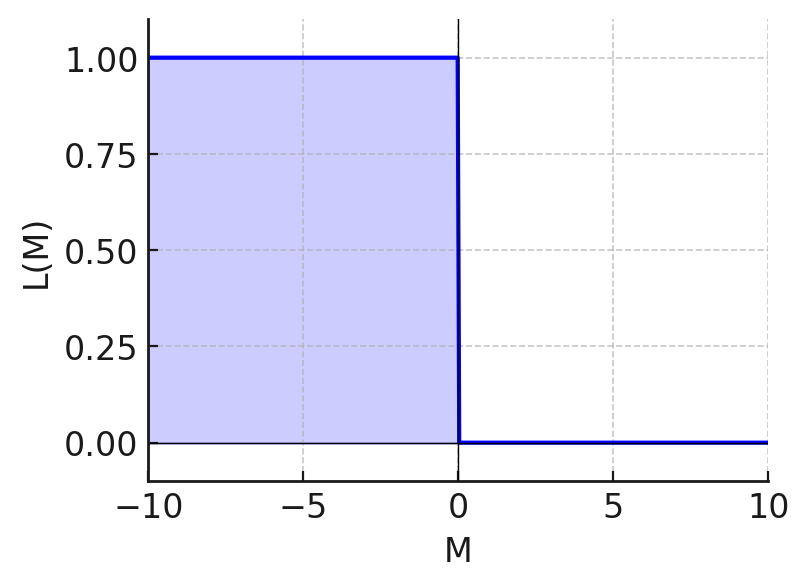

К такому функционалу нельзя применить градиентные методы... Но выход есть - используем порогувую функцию потерь в качестве верхней оценки. Использование пороговой функции потерь позволяет свести задачу оптимизации дискретного функционала к задаче оптимизации гладкого функционала.
Примеры пороговых функций потерь:<br>
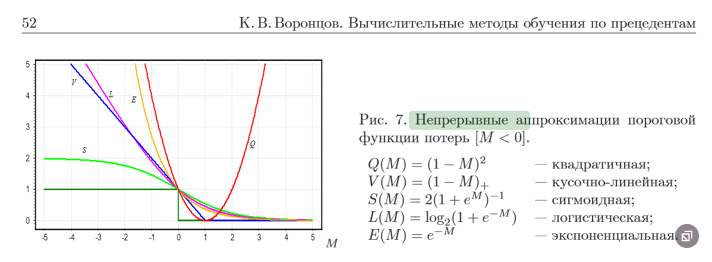

Собственно, обучение линейного классификатора сводится к выбору непрерывной апроксимирующей функции для дискретной функции потерь и применению для нее градиентных методов. 

✅<b>Порог в линейной классификации.</b><br>
Так как классификатор проводит гиперплоскость, которая и разделяет классы, то очевидно, что если ее немного подвинуть, то некоторые объекты могут быть классифицированны иначе. Это касается особенно тех объектов, что находятся вблизи классификатора. Этот самый сдвиг классификатора и называется порогом. Если отступ от классификатора велик, то модель в нем уверена, если же нет, то модель не уверена. В таком случае
при изменении порога объекты, которые были отнесены к положительному классу, но в которых модель слабо была уверена(имели небольшой отступ), будут отнесены к отрицательному классу. Иными словами сдвиг порога уменьшает число объектов положительного класса. Порог выбирается так, чтобы большинство объектов, в которых модель была не уверена, оказались за ним.

<h2>🚩Метрики качества классификации</h2>

✅Чтобы разобраться с метриками для классификации, сначала ввведем такое понятие, как матрица ошибок(Confusion Matrix).<br>
<b>Confusion matrxi(матрица ошибок классификации)</b> - статистика по классифицированным объектам. Пусть у нас есть два класса - (0, 1).
Возможно четыре исхода:
<ol>
    <li>Объект положительного класса был классифицирован как объект положительного класса. Такой исход называют True Positive(TP).</li>
    <li>Объект отрицательного класса был классифицирован как объект отрицательного класса. Такой исход называют False Positive(FP).</li>
    <li>Объект отрицательного класса был классифицирован как объект положительного класса, то есть классификатор допустил ошибку первого рода - принял неверное за верное. Этот исход называют False Positive(FP).</li>
    <li>Объект положительного класса был классифицирован как объект отрицательного класса, то есть классификатор допустил ошибку второго рода - принял верное за неверное. Этот исход называют False Negative(FN).</li>
</ol>

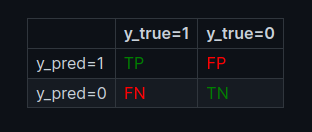

**Accuracy**(точность) - представляет собой долю правильных классификаций моделью. Можно найти по формуле:<br>
$ACC=\frac{TP+TN}{TP+TN+FP+FN}$.<br>
Эта метрика легка в интерпретации, но на практике используется редко, так как она чувствительна к дисбалансу классов в обучающей выборке.

**Precision**(тоже точность, PositivePredictiveValue) - способность модели верно классифицировать положительный(да и в принципе какой угодно) класс. Считается как отношение TP к сумме TP и FP:<br>
$precision=\frac{TP}{TP+FP}$.<br>
Легко увидеть, что отношение всех объектов к одному классу уменьшит точность.

**Recall**(полнота, она же TruePositiveRate) - способность модели обнаруживать объекты положительного(да и в принципе какого угодно) класса. Считается как отношение TP к сумме TP и FN:<br>
$recall=\frac{TP}{TP+FN}$.

❗Точность и полноту для каждого класса легко определять с помощью матрицы ошибок. Точность равна отношению соответствующего диагонального элемента матрицы и суммы элементов всей строки класса, а полнота — отношению диагонального элемента матрицы и суммы элементов всего столбца класса.

**Специфичность**(specificity, она же TrueNegativeRate) - показывает способность классификатора верно находить объекты отрицательного класса. Считается как отношение TN к TN и FN:<br>
$Sp=\frac{TN}{TN+FN}$.

**F1-score**(F-мера) - среднее геометрическое precision и recall. Хоть precision и recall устойчивы к дисбалансу классов, но нередко на практике приходится находить их оптимальные значения, так как достижение ими обоими максимума невозможно. Для этого и вводится F-мера. Сосчитаем ее:<br>
$F1_{score}=\frac{2}{\frac{1}{precision} + \frac{1}{recall}}=\frac{2TP}{2TP + FP + FN}$<br>
Есть также и ее взвешенный вариант. Параметр $\beta$ регулирует важность точности и полноты. Формула:<br>
$F1_{score} = \frac{(1-\beta^2) \cdot PPV \cdot TPR}{\beta^2 \cdot PPV + TPR}$.<br>
Если параметр $0<\beta<1$ , то приоритет имеет точность, а если $\beta>1$ , то полнота.

F-мера лучше арифметического среднего и минимума тем, что, в отличии от них, она
является сглаженной функцией. Она близка к нулю, если хотя бы один из аргументов
близок к нулю.<br>
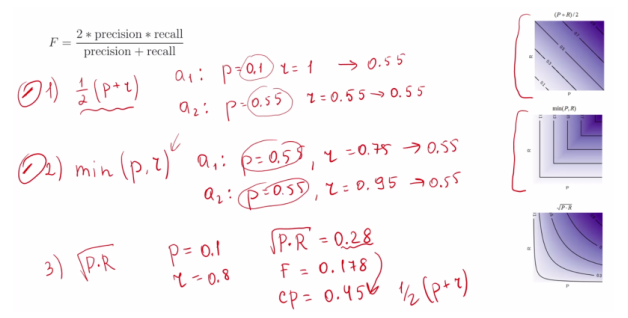

**Метрика $P4$** -  была разработана как расширение $F1$-меры, обладающее симметрией относительно инверсии классов. Вычисляется по формуле:
<br>$P4=\frac{4\cdot TP \cdot TN}{4\cdot TP \cdot TN + (TP+TN) \cdot(FP + FN)}$<br>
Метрика $P4$​ изменяется в диапазоне от 0 до 1. Чем ближе значение метрики к 1, тем лучше работает модель. Очевидно, что значение меры стремится к 0, если хотя бы один из множителей в числителе становится равным нулю, т.е. когда модель теряет способность правильно распознавать положительные или отрицательные примеры.

✅<b>ROC-Curve и PR-Curve</b>

✅**ROC-Curve(Receiver Operating Characteristics curve)** - позволяет не только оценить качество работы классификатора, но и исследовать его поведение при различных значениях дискриминационного порога.  Рассмотрим совместно $TPR$ и $TNR$ классификатора. $TPR$ показывает, насколько хорошо модель классифицирует положительные примеры. Очевидно, что если все положительные примеры классифицированы правильно (т.е. число ложноотрицательных случаев равно 0), то $TPR=1$. $TNR$ показывает, насколько хорошо модель классифицирует отрицательные примеры. Очевидно, что если все отрицательные примеры классифицированы правильно (т.е. число ложноположительных случаев равно 0), то $TPR=1$.<br>

Таким образом, по отдельности $TPR$ и $TNR$ характеризуют способность модели распознавать только один из классов. Но их совместное использование помогает создать метрику, которая позволяет выбирать значение дискриминационного порога, который оптимально балансирует модель между способностью распознавать положительные и отрицательные примеры. Именно эта задача и решается с помощью $ROC$-кривой.<br>

Действительно, если изменять дискриминационный порог от 0 до 1 и наносить по оси абсцисс точки $1−TNR$, а по оси ординат $TPR$, то полученный график и будет $ROC$-кривой. Величину $1−TNR$ называют долей ложноположительных классификаций (false positive rate) или показателем ложной тревоги. Она вычисляется следующим образом:<br>
$1-TNR=FPR=\frac{FP}{FP + TN}$, а $TPR=\frac{TP}{TP+FN}$<br>
При пороге, равном 1, все примеры будут классифицированы как отрицательные ($FPR=1$, $TPR=1$), а при пороге, равном 0, — как положительные ($FPR=0$, $TPR=0$). Поэтому ROCROC-кривая всегда идет от точки (0,0) до точки (1,1).<br>
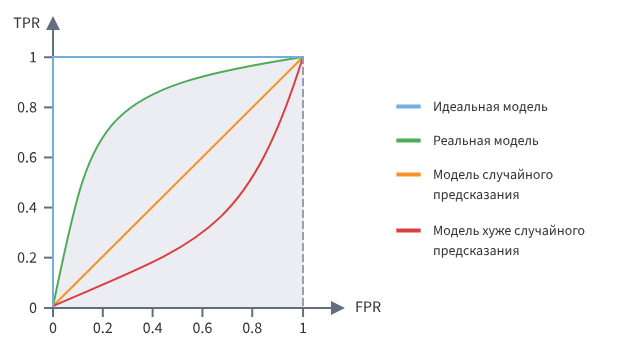

Несложно увидеть, что для идеальной модели $ROC$-кривая превращается в ломаную, проходящую через точки (0,0), (0,1) и (1,1). При этом [площадь под ROC-кривой](https://wiki.loginom.ru/articles/auc.html) ($AUC$ — Area Under Curve) окажется равной 1. Площадь под кривой выделена на рисунке светло-серым цветом.<br>

Точка (0,1) соответствует идеальному состоянию модели, в котором и $TPR$, и $TNR$ одновременно равны 1. Т.е. модель одинаково хорошо «научилась» работать как с положительными, так и с отрицательными примерами при существующем в обучающей выборке балансе классов.<br>

Идеальная модель является скорее гипотетической и на практике, как правило, недостижима. Поэтому обычно приходится иметь дело с $ROC$-кривыми, которые не проходят через точку (0,1), а приближаются к ней на определенное расстояние. Соответственно и $AUC−ROC$ оказывается меньше 1.<br>

Таким образом показатель $AUC−ROC$ является удобной мерой качества классификатора относительно идеального. Принята следующая шкала оценки качества:<br>
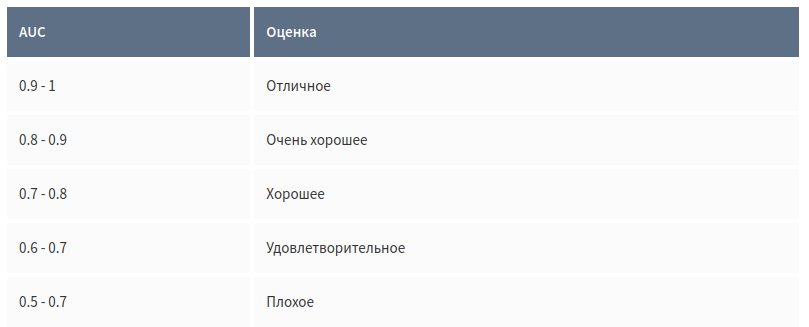<br>
Если $AUC−ROC=0.5$, то $ROC$-кривая превращается в линию, проходящую через точки (0,0) и (1,1), которая соответствует бесполезному классификатору, работающему как случайный предсказатель. Если $AUC−ROC<0.5$, то получается модель, которая работает хуже случайного предсказателя и от ее использования следует отказаться.

✅<b>Построение ROC-Curve</b><br>
чтобы построить ROC кривую, нужно отсортировать наши объекты по степени уверенности модели(по возрастанию, то есть начинаем с того объекта, в котором модель уверена меньше всего). После мы должны рассчитать порог по следующим
формулам:<br>
$t_{i+1}=max(b(x_i))$<br>
$t_{i}=\frac{b(x_{i+1})+b(x_i)}{2}$<br>
Процесс построения следующий: начинаем строить в точке с максимальным порогом(это точка (0, 0) - иными словами ни один объект не будет отнесен к положительному классу). После выбираем следующий порог и для него считаем FPR и TPR и так делаем последовательно, пока не дойдем до t-го порога.<br>
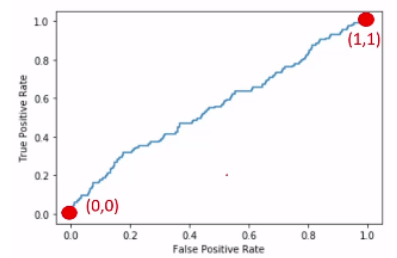<br>
Пример построения своими руками:<br>
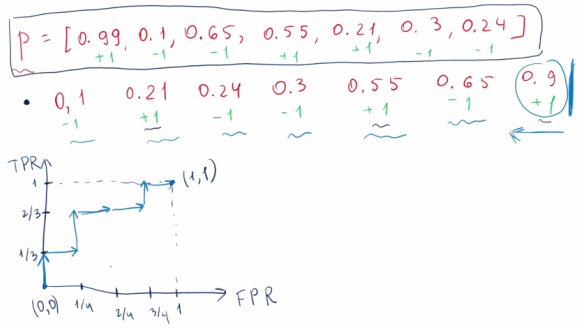

✅<b>$PR$-кривые</b> определяются аналогично $ROC$-кривым, но только по оси абсцисс у них откладываются значения полноты(recall), а по оси ординат — точности(precision).<br>
<ul>
<li>Точность и полнота — две наиболее важные метрики, на которые следует обращать внимание при оценке качества модели бинарной классификации в условиях несбалансированности классов. Они помогают увидеть, какая часть фактически положительных наблюдений была классифицирована правильно, и какие среди классифицированных как положительные, были истинноположительными.</li>
<li>Если точность равна 1, то ложноположительные классификации отсутствуют. Но это ничего не говорит о том, были ли распознаны все положительные примеры. Если полнота равна 1, то все положительные объекты были распознаны правильно, а ложноотрицательные классификации отсутствуют. При этом ничего не говорится о том, сколько было допущено ложноположительных классификаций.</li>
<li>Таким образом, точность и полнота не особенно полезны для оценки качества классификатора, если их использовать по отдельности. В задаче классификации оценка точности, равная 1 для класса $C$, означает, что каждый элемент, помеченный как принадлежащий классу $C$, действительно принадлежит к классу $C$, но ничего не говорит о количестве элементов из класса $C$, которые не были правильно классифицированы. Тогда как полнота, равная 1, означает, что каждый элемент из класса $C$ был помечен как принадлежащий к классу $C$, но ничего не говорит о том, сколько элементов из других классов были также неправильно классифицированы как принадлежащие к классу $C$.</li>
<li>Обычно показатели точности и полноты не используются по отдельности. Вместо этого либо значения одной меры сравниваются с фиксированным уровнем другой (например, точность на уровне полноты 0.75), либо обе меры объединяются в один показатель. Примерами такой комбинации и является $F1$-мера — взвешенное гармоническое среднее точности и полноты.</li>
<li>Еще одним способом комбинирования точности и полноты в задаче оценки качества классификации являются так называемые кривые полнота-точность, которые строятся в системе координат, где по оси абсцисс откладывается полнота, а по оси ординат — точность. Кривая точность-полнота показывает, как выбор порога влияет на точность классификатора, а также помогает выбрать лучшее значение дискриминационного порога для определенного баланса классов.</li>
</ul>

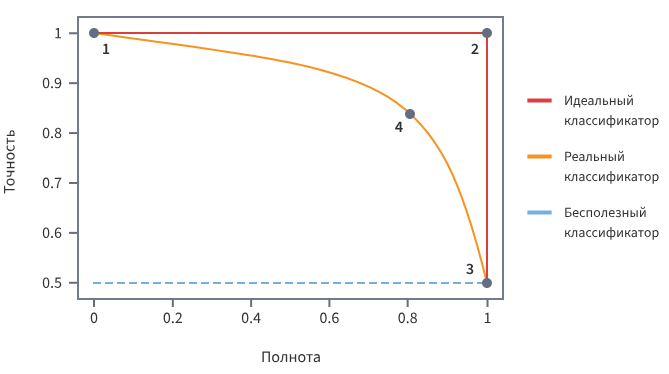

Каждая точка $PR$-кривой представляет определенное значение дискриминационного порога, а ее расположение соответствует результирующей точности и полноте, когда этот порог выбран. Точка 1 на рисунке соответствует значению дискриминационного порога, равному 1, а точка 3 — значению порога 0. Точка 2 соответствует идеальному классификатору и совпадает с координатами (1,1), а точка 4 — оптимальному значению порога (точка кривой, наиболее близкая к идеальной точке (1,1)).

Преимущества $PR$-кривой по сравнению с $ROC$:
<ul>
<li>$ROC$-кривая, как правило, дает чрезмерно оптимистичную картину в условиях несбалансированности классов.</li>
<li>При изменении распределения классов $ROC$-кривая не меняется, а $PR$-кривая отражает изменение.</li>
</ul>

Аналогично $ROC$-кривой, площадь под $PR$-кривой (для отличия от $ROC$ ее часто называют $PR−AUC$) отражает качество классификатора и позволяет сравнивать кривые, соответствующие различным балансам классов и значениям порога. Чем выше площадь, тем лучше работает модель.<br>
Пунктирная линия внизу графика соответствует бесполезному классификатору (no-skill model — модель без навыков, или базовая модель), уровень которой изменяется при изменении баланса классов. Такая модель будет присваивать рейтинг 0.5 для любого примера.<br>
На рисунке ниже представлена линия, соответствующая балансу классов, когда положительные примеры составляют 10% от обучающей выборки.<br>
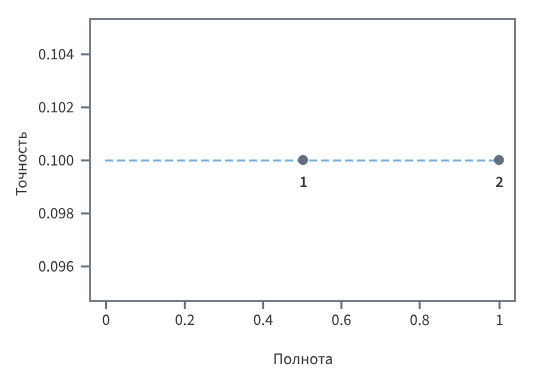<br>

На рисунке точка 1 соответствует порогу 0.5, точка 2 соответствует порогу [0, 0.5). Для порогов (0.5, 1] точность не определена из-за деления на ноль. Можно увидеть, что точность здесь является константой, то есть $PPV=0.1$ (соответствует доле положительного класса), $PR−AUC=0.1$.<br>
Таким образом, полнота базовой модели лежит в диапазоне (0.5, 1] независимо от дисбаланса классов, а точность равна доле положительного класса в обучающей выборке.<br>
На следующем рисунке представлена $PR$-кривая для идеальной модели. На ней точка 1 соответствует порогу (0, 1], точка 2 соответствует порогу 0. Очевидно, что $PR−AUC=1$.<br>
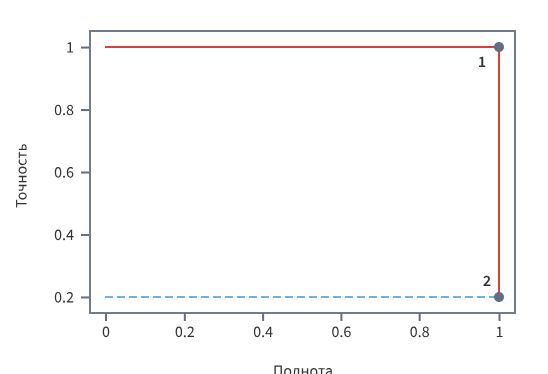<br>

И, наконец, на рисунке ниже отображена $PR$-кривая (красная линия) для модели, которая работает хуже, чем базовая модель «без навыков» (синяя пунктирная линия). Она расположена ниже линии базовой модели.<br>
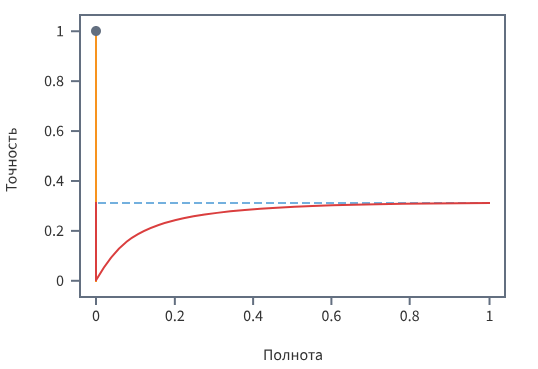<br>

Очевидный способ повысить качество «плохой» модели без каких-либо настроек — просто инвертировать классы (класс 0 изменить на класс 1). Это автоматически приведет к повышению точности по сравнению с базовой моделью.<br>
Обычно «плохая» $PR$-кривая классификатора указывает на то, что в обучающих данных присутствуют проблемы: они содержат шум или классы в них плохо выражены (модель не может выявить закономерность, в соответствии с которой один класс отличается от другого). В этом случае $PR−AUC$ не превышает доли положительных примеров обучающей выборке.<br>
Возможен гибридный случай, когда «плохая» модель работает лучше, чем модель «без навыков», но для определенных пороговых значений.

<h2>🚩Про шансы</h2>

✅Было бы неплохо, чтобы модель вместе с меткой класса возвращала еще и вероятность пренодлежности объекта к положительному классу. Вероятность принадлежности объекта к классу означает, что если мы возьмем множество объектов с таким же ответом модели, то среди них положительных классов будет именно предсказанная доля:<br>
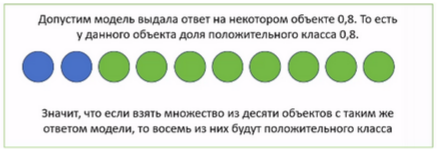<br>

Попробуем внедрить это требование к модели. Для этого переведем значение скалярного произведения в интервал [0, 1]. Сделаем это при помощи логарифма шансов:<br>
$wx+w_0=log(\frac{p_+}{1-p_+})\Rightarrow e^{(wx+w_0)}=\frac{p_+}{1-p_+}\Rightarrow 1-p_{+}=\frac{p_+}{e^{(wx+w_0)}}\Rightarrow p_+=\frac{1}{e^{-(wx+w_0)}+1}$<br>
Полученная функция называется сигмоидой и позволяет перекладывать значения отступа модели в вероятности. График сигмоиды:<br>
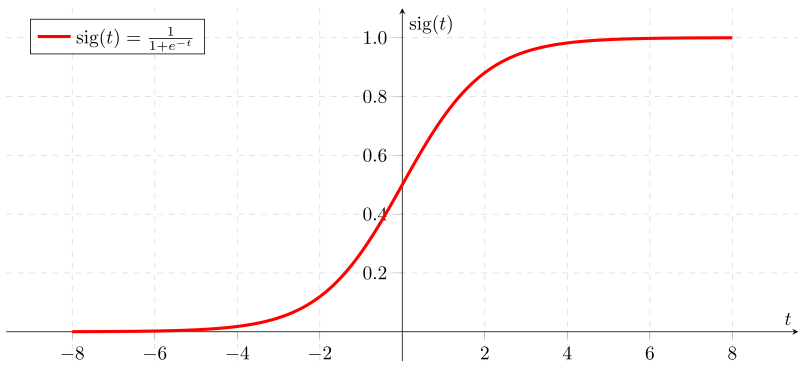<br>
В качестве t и будем использовать скалярное произведение.<br>
Исходя из анализа графика можно сделать вывод, что если скалярное произведение очень мало, то сигмоида близка к нулю. Велико - к единице. Близко к нулю - к ½. Если вспомнить, что скалярное произведение - это отступ, то есть некая степень
уверенности классификатора в своем ответе, то задачу можно поставить, как максимизацию этого самого отступа(скалярного произведения) - к какому бы классу объект не относился, мы хотим максимизировать отступ, чтобы повысить степень
уверенности классификатора.<br>
$y_i=\left\langle w, x_i \right\rangle\longrightarrow max_w$

✅Выведем функционал качества для данной задачи, воспользовавшись методом максимального правдоподобия:<br>
Изначальная форма логистических потерь:<br>
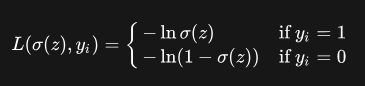<br>
Метод максимального правдоподобия:<br>
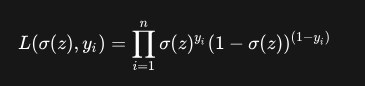<br>
Логистические потери с логарифмом подобия:<br>
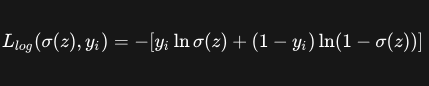<br>
Функция потерь для всего обучающего набора:<br>
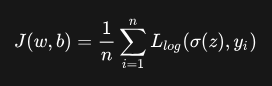<br>
Для функционала вые уже можно найти градиент.<br>
В итоге мы получили логистический функционал потерь!<br>
Линейная модель классификации, настроенная путем минимизации функционала, который построен на логистической функции потерь, называется
логистической регрессией. То есть внутри логистической регрессии используется логистическая функция потерь. Она оптимизирует оценки правдоподобия выборки и дает оценки вероятности принадлежности объектов к положительному классу.<br>
Как можно было догадаться, обучение логистической регрессии происходит идентично линейной за исключением пропуска линейных прогнозов через сигмоидальную функцию на каждой итерации. С помощью полученных весов сначала выполняется линейный прогноз, а затем итоговый через сигмоидальную функцию: полученные вероятности округляются согласно заданному порогу (обычно 0.5).<br>
Стоит также отметить, что для логистической регрессии характерны такие же особенности в плане оптимизации и регуляризации, как и для линейной.<br>
Статья <a href="https://habr.com/ru/articles/803397/">тут</a>

<h2>🚩Примеры построения ROC-Curve и PR-Curve</h2>

In [1]:
# Загрузим данные и обучим модель
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Используем pipeline для упрощения тренировки модели
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

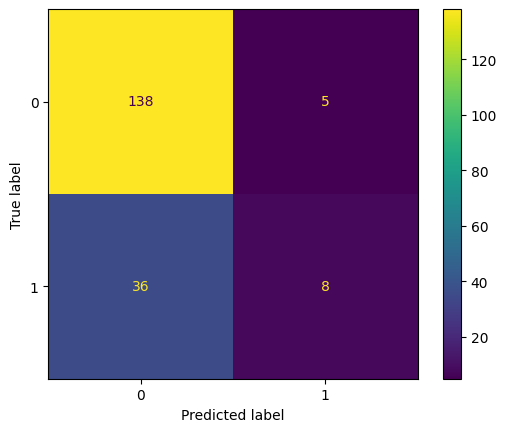

In [2]:
# Создадим и выведем матрицу ошибок
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


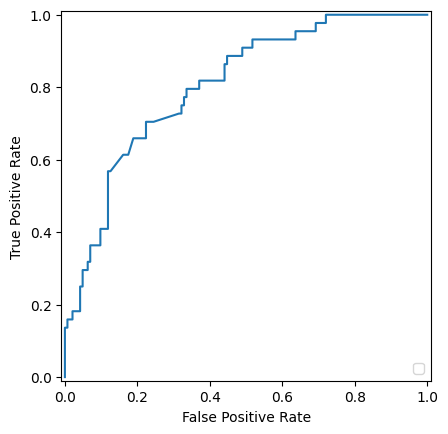

In [3]:
# Посчитаем и отрисуем ROC-кривую
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

y_score = clf.decision_function(X_test)

# найдем FalsePositiveRate, TruePositiveRate и порог
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [4]:
# посчитаем площадь под кривой
auc(fpr, tpr)

0.8045136681500318

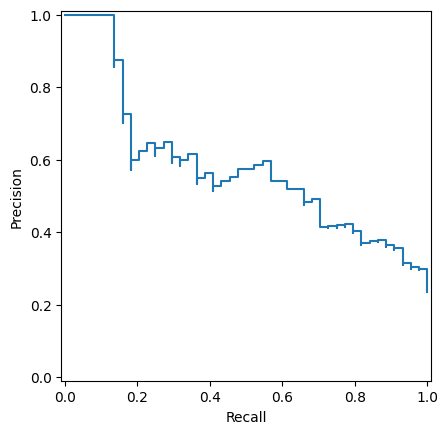

In [5]:
# Посчитаем и отрисуем PR-кривую
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [6]:
# посчитаем площадь под кривой
auc(recall, prec)

0.5779539559689106

<h2>🚩Посмотрим также на логистическую регрессию в задаче мультиклассификации</h2>

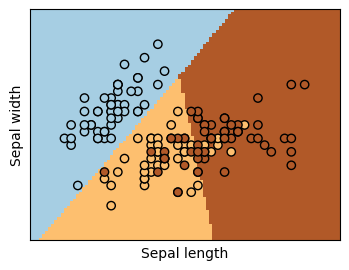

In [7]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

<h2>🚩Метод Опорных Векторов</h2>

✅Еще одним методом линейной классификации является метод опорных векторов

Идею метода удобно проиллюстрировать на следующем простом примере: даны точки на плоскости, разбитые на два класса (рис. 1). Проведем линию, разделяющую эти два класса (красная линия на рис. 1). Далее, все новые точки (не из обучающей выборки) автоматически классифицируются следующим образом:<br>
точка выше прямой попадает в класс A,<br>
точка ниже прямой — в класс B.<br>
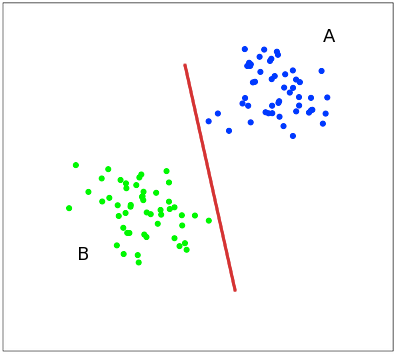<br>
Такую прямую назовем разделяющей прямой. Однако, в пространствах высоких размерностей прямая уже не будет разделять наши классы, так как понятие «ниже прямой» или «выше прямой» теряет всякий смысл. Поэтому вместо прямых необходимо рассматривать гиперплоскости — пространства, размерность которых на единицу меньше, чем размерность исходного пространства. В $\mathbb{R}^3$, например, гиперплоскость — это обычная двумерная плоскость.<br>
В нашем примере существует несколько прямых, разделяющих два класса (рис. 2):<br>
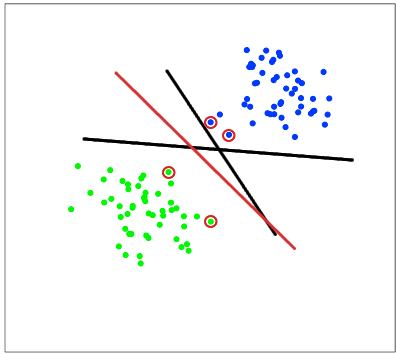<br>
С точки зрения точности классификации лучше всего выбрать прямую, расстояние от которой до каждого класса максимально. Другими словами, выберем ту прямую, которая разделяет классы наилучшим образом (красная прямая на рис.2). Такая прямая, а в общем случае — гиперплоскость, называется оптимальной разделяющей гиперплоскостью.<br>
Вектора, лежащие ближе всех к разделяющей гиперплоскости, называются опорными векторами (support vectors). На рисунке 2 они помечены красным.

<b>✅Немного математики</b><br>
Пусть имеется обучающая выборка: $(x_1, y_1), . . .,(x_i, y_i), x_i \in \mathbb{R}^n, y_i \in (-1, 1)$<br>
Метод опорных векторов строит классифицирующую функцию F в виде $F=sign(\left\langle w,x  \right\rangle + b)$,
где $\left\langle w,x  \right\rangle$ — скалярное произведение, $w$ — нормальный вектор к разделяющей гиперплоскости, $b$ — вспомогательный параметр. Те объекты, для которых $F(x) = 1$ попадают в один класс, а объекты с $F(x) = -1$ — в другой. Выбор именно такой функции неслучаен: любая гиперплоскость может быть задана в виде $\left\langle w,x  \right\rangle + b = 0$ для некоторых $w$ и $b$.<br>
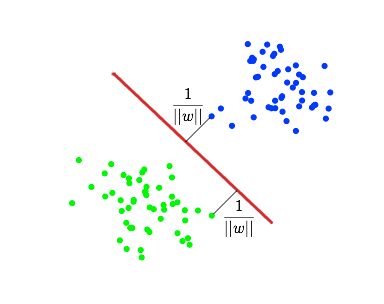<br>
Далее, мы хотим выбрать такие $w$ и $b$ которые максимизируют расстояние до каждого класса. Можно подсчитать, что данное расстояние равно $\frac{1}{\left\| w \right\|}$. Проблема нахождения максимума $\frac{1}{\left\| w \right\|}$ эквивалентна проблеме нахождения минимума $\left\| w \right\|^2$. Запишем все это в виде задачи оптимизации:<br>
$\left\{ \begin{array}{cl}
argmin_{w,b}\left\| w \right\|^2 \\
y_i(\left\langle w,x_i \right\rangle+b)\ge 1;i=1,...,m\
\end{array} \right.$<br>
которая является стандартной задачей квадратичного программирования и решается с помощью множителей Лагранжа. Описание данного метода можно найти в Википедии.

<b>✅Линейная неразделимость</b><br>
На практике случаи, когда данные можно разделить гиперплоскостью, или, как еще говорят, линейно, довольно редки. Пример линейной неразделимости можно видеть на рисунке 3:<br>
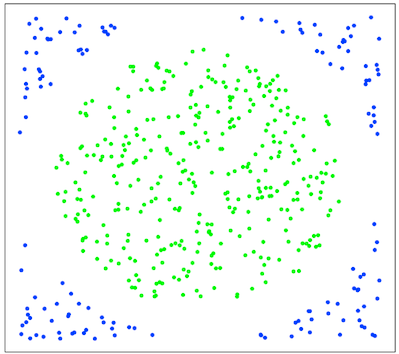<br>
В этом случае поступают так: все элементы обучающей выборки вкладываются в пространство X более высокой размерности с помощью специального отображения $\varphi:\mathbb{R}^n\longrightarrow X$. При этом отображение $\varphi$ выбирается так, чтобы в новом пространстве X выборка была линейно разделима.<br>
Классифицирующая функция $F$ принимает вид $F=sign(\left\langle w,x  \right\rangle + b)$. Выражение $k\left\langle x,x^{'} \right\rangle=\left\langle \varphi(x),\varphi(x^{'}) \right\rangle$ называется ядром классификатора. С математической точки зрения ядром может служить любая положительно определенная симметричная функция двух переменных. Положительная определенность необходимо для того, чтобы соответствующая функция Лагранжа в задаче оптимизации была ограничена снизу, т.е. задача оптимизации была бы корректно определена.<br>
Точность классификатора зависит, в частности, от выбора ядра. Чаще всего на практике встречаются следующие ядра:<br>
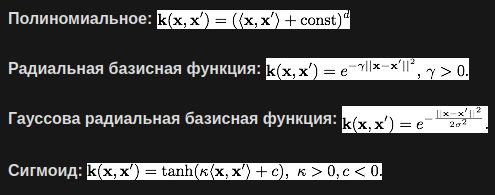

Также в линейно неразделимом случае можно поступить следующим образом:<br>
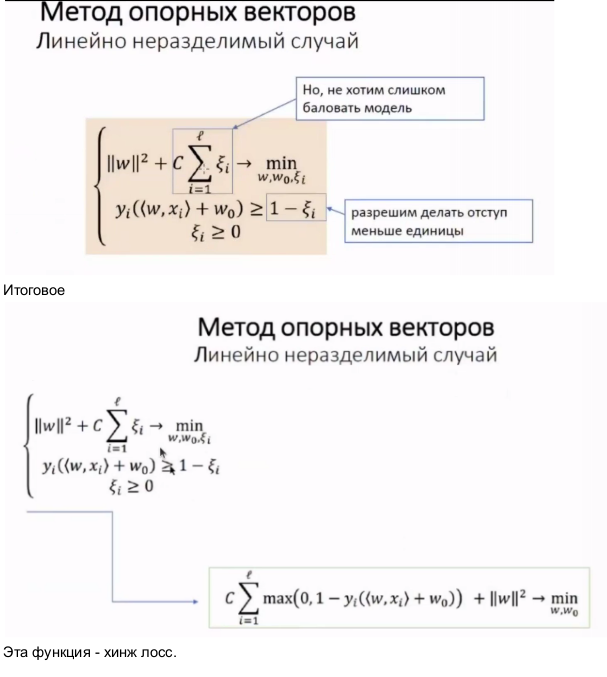<br>
ВАЖНО - SVM не возвращает вероятности классов, он возвращает только метки!

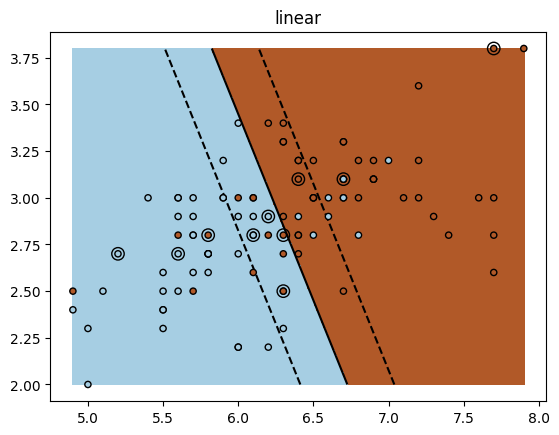

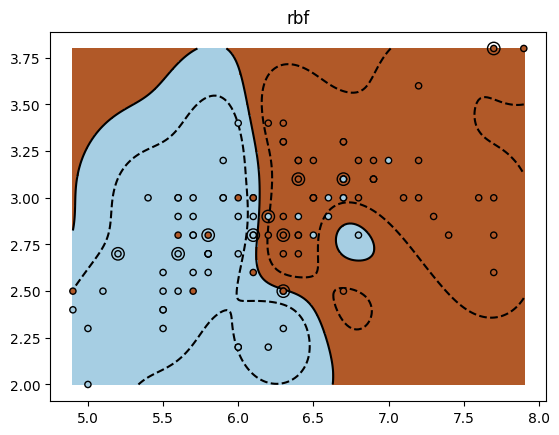

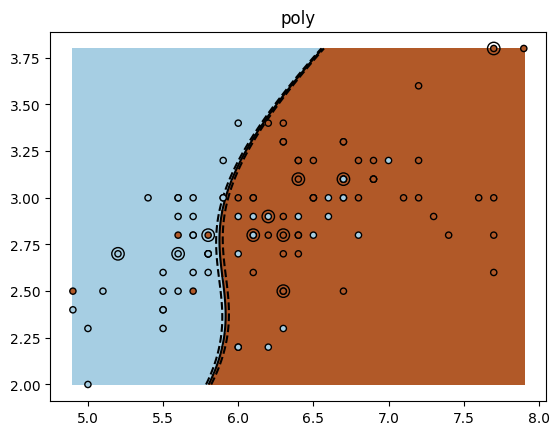

In [8]:
# Посмотрим на пример использования различных ядер в SVM
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()